# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

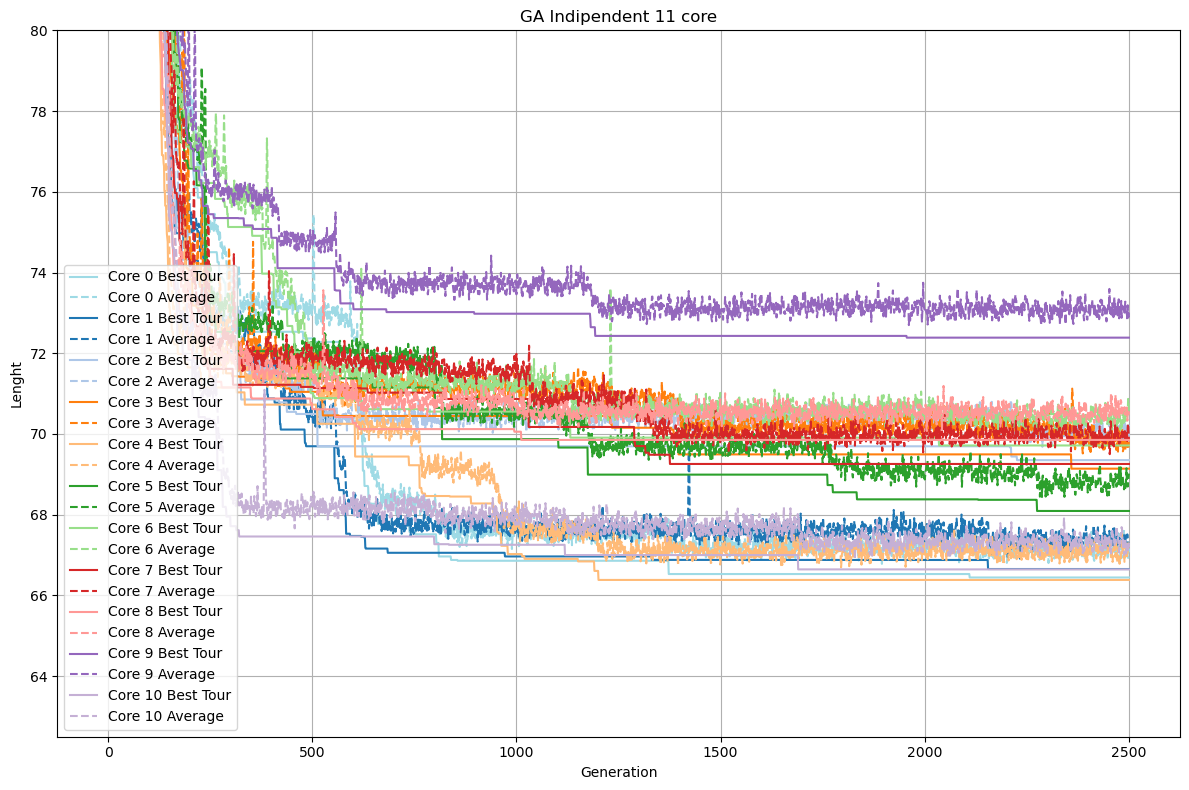

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

# Numero di core paralleli
num_cores = 11

# Colori per distinguere i core
colors = plt.cm.tab20.colors

# Creiamo un grafico
plt.figure(figsize=(12, 8))

# Loop sui file "BestTourL_2.dat" e "AverageL_2.dat"
for core_id in range(0, num_cores ):
    # Leggi il file BestTourL_2.dat
    best_tour_file = f"OUTPUT/Indipendent/{core_id}BestTourL_2.dat"
    try:
        best_tour_data = pd.read_csv(best_tour_file, sep='\s+', header=0)
        plt.plot(best_tour_data.iloc[:, 0], best_tour_data.iloc[:, 1], 
                 label=f"Core {core_id} Best Tour", color=colors[(core_id - 1) % len(colors)], linestyle='-')
    except FileNotFoundError:
        print(f"File {best_tour_file} non trovato.")

    # Leggi il file AverageL_2.dat
    average_file = f"OUTPUT/Indipendent/{core_id}AverageL_2.dat"
    try:
        average_data = pd.read_csv(average_file, sep='\s+', header=0)
        plt.plot(average_data.iloc[:, 0], average_data.iloc[:, 1], 
                 label=f"Core {core_id} Average", color=colors[(core_id - 1) % len(colors)], linestyle='--')
    except FileNotFoundError:
        print(f"File {average_file} non trovato.")

# Configura il grafico
plt.title("GA Indipendent 11 core")
plt.xlabel("Generation")
plt.ylabel("Lenght")
plt.ylim(62.5,80.0)
plt.legend(loc="best", fontsize=10)
plt.grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()

In [12]:
# Numero di core paralleli
num_cores = 11

for core_id in range(0, num_cores):
    # Specifica il percorso del file
    file_path = f"OUTPUT/Indipendent/{core_id}output.dat"  # Modifica il percorso in base alla struttura dei tuoi file
    try:
        # Apre il file in modalità lettura
        with open(file_path, 'r') as filed:
            # Legge tutto il contenuto del file
            content = filed.read()
        # Stampa il contenuto del file a video
        print(f"Contenuto di {file_path}:")
        print(content)
    except FileNotFoundError:
        print(f"File non trovato: {file_path}")


Contenuto di OUTPUT/Indipendent/0output.dat:
---------------------Indipendent---------------------

Tot Gen:2500
Best road Lenght:66.4448

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Contenuto di OUTPUT/Indipendent/1output.dat:
---------------------Indipendent---------------------

Tot Gen:2500
Best road Lenght:66.6546

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Contenuto di OUTPUT/Indipendent/2output.dat:
---------------------Indipendent---------------------

Tot Gen:2500
Best road Lenght:69.3516

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Contenuto di OUTPUT/Indipendent/3output.dat:
---------------------Indipendent---------------------

Tot Gen:2500
Best road Lenght:69.1411

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Contenuto di OUTPUT/Indipendent/4output.dat:
---------------------Indipendent---------------------

Tot Gen:2500
Best road Lenght:66.3841

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Contenuto di OUTPUT/Indipendent/5output.dat:
---------------------Indipendent---------------------

Tot Gen:2500
Best road Lenght:

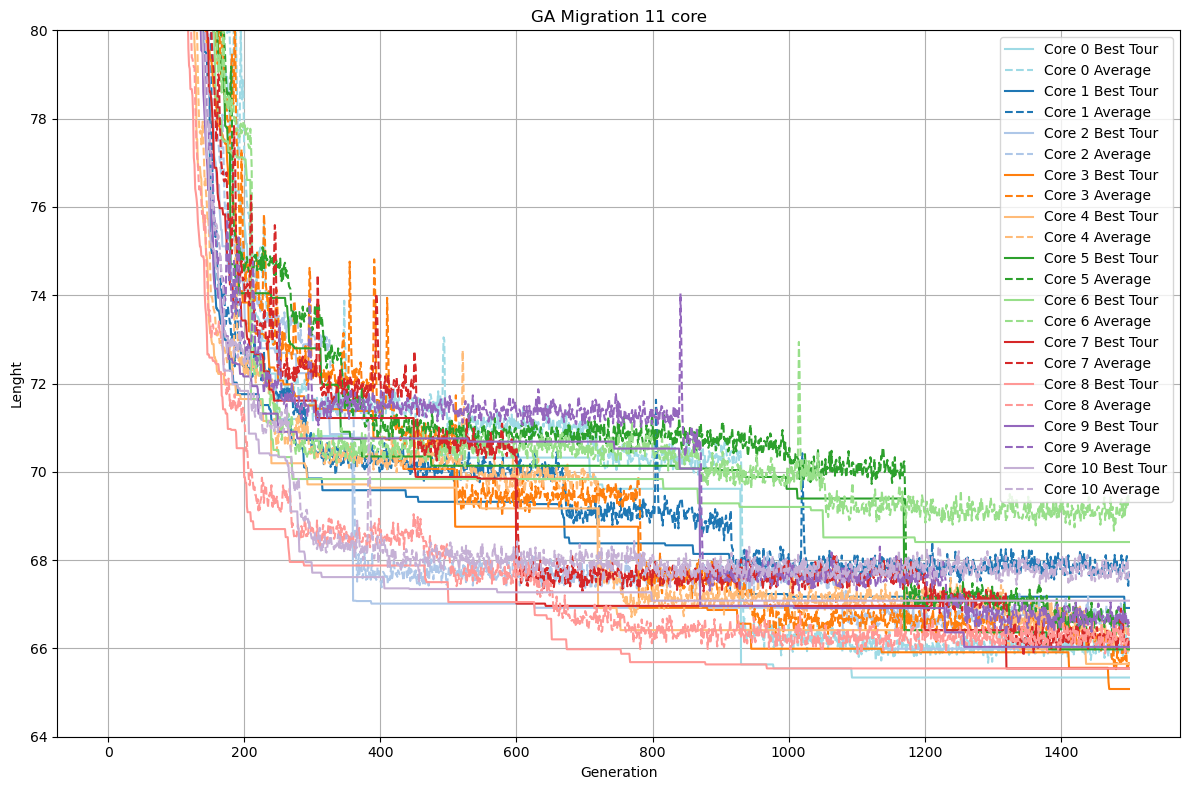

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

# Numero di core paralleli
num_cores = 11

# Colori per distinguere i core66.3841
colors = plt.cm.tab20.colors

# Creiamo un grafico
plt.figure(figsize=(12, 8))

# Loop sui file "BestTourL_2.dat" e "AverageL_2.dat"
for core_id in range(0, num_cores ):
    # Leggi il file BestTourL_2.dat
    best_tour_file = f"OUTPUT/Migration/{core_id}BestTourL_2.dat"
    try:
        best_tour_data = pd.read_csv(best_tour_file, sep='\s+', header=0)
        plt.plot(best_tour_data.iloc[:, 0], best_tour_data.iloc[:, 1], 
                 label=f"Core {core_id} Best Tour", color=colors[(core_id - 1) % len(colors)], linestyle='-')
    except FileNotFoundError:
        print(f"File {best_tour_file} non trovato.")

    # Leggi il file AverageL_2.dat
    average_file = f"OUTPUT/Migration/{core_id}AverageL_2.dat"
    try:
        average_data = pd.read_csv(average_file, sep='\s+', header=0)
        plt.plot(average_data.iloc[:, 0], average_data.iloc[:, 1], 
                 label=f"Core {core_id} Average", color=colors[(core_id - 1) % len(colors)], linestyle='--')
    except FileNotFoundError:
        print(f"File {average_file} non trovato.")

# Configura il grafico
plt.title("GA Migration 11 core")
plt.xlabel("Generation")
plt.ylabel("Lenght")
plt.ylim(64.0,80.0)
plt.legend(loc="best", fontsize=10)
plt.grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()


In [14]:
# Numero di core paralleli
num_cores = 11

for core_id in range(0, num_cores):
    # Specifica il percorso del file
    file_path = f"OUTPUT/Migration/{core_id}output.dat"  # Modifica il percorso in base alla struttura dei tuoi file
    try:
        # Apre il file in modalità lettura
        with open(file_path, 'r') as filed:
            # Legge tutto il contenuto del file
            content = filed.read()
        # Stampa il contenuto del file a video
        print(f"Contenuto di {file_path}:")
        print(content)
    except FileNotFoundError:
        print(f"File non trovato: {file_path}")


Contenuto di OUTPUT/Migration/0output.dat:
---------------------Migration---------------------

Tot Gen:1500
Best road Lenght:65.3408

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Contenuto di OUTPUT/Migration/1output.dat:
---------------------Migration---------------------

Tot Gen:1500
Best road Lenght:66.9166

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Contenuto di OUTPUT/Migration/2output.dat:
---------------------Migration---------------------

Tot Gen:1500
Best road Lenght:65.9931

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Contenuto di OUTPUT/Migration/3output.dat:
---------------------Migration---------------------

Tot Gen:1500
Best road Lenght:65.081

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Contenuto di OUTPUT/Migration/4output.dat:
---------------------Migration---------------------

Tot Gen:1500
Best road Lenght:65.6501

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Contenuto di OUTPUT/Migration/5output.dat:
---------------------Migration---------------------

Tot Gen:1500
Best road Lenght:65.9787

\\\\\\\\\\\\\\\\

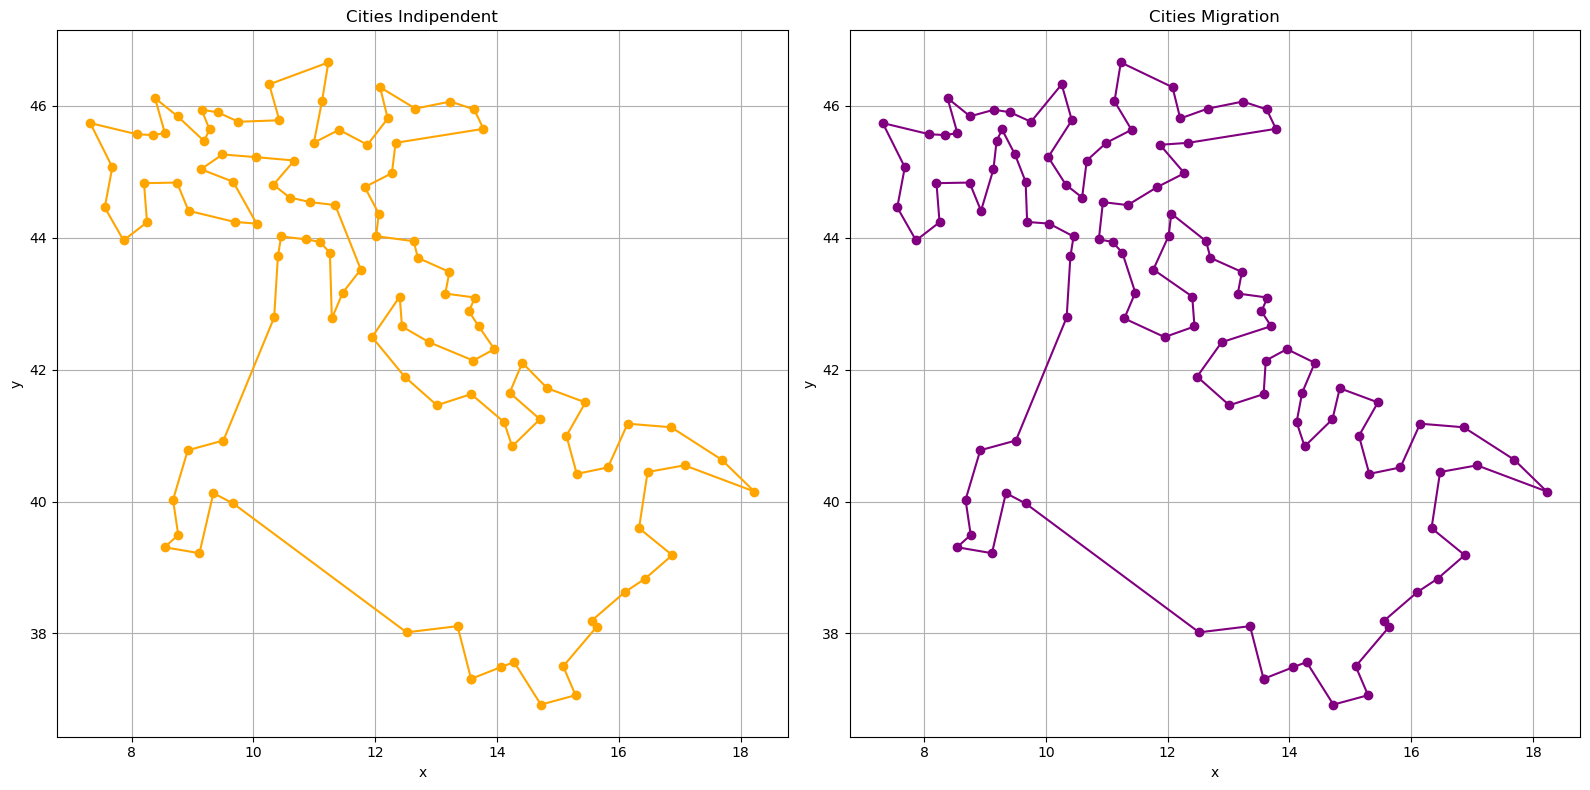

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
file_path_square = 'OUTPUT/Indipendent/4Besttour.dat'  
file_path_circumference = 'OUTPUT/Migration/3Besttour.dat' 

# Legge i dati dal file Square
square_data = pd.read_fwf(file_path_square, skiprows=1, header=None)
x_square = square_data[0]
y_square = square_data[1]

# Legge i dati dal file Circumference
circumference_data = pd.read_fwf(file_path_circumference, skiprows=1, header=None)
x_circumference = circumference_data[0]
y_circumference = circumference_data[1]

# Crea i subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Primo subplot - Square
axes[0].plot(x_square, y_square, marker='o', linestyle='-', color='orange')
axes[0].set_title('Cities Indipendent')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True)

# Secondo subplot - Circumference
axes[1].plot(x_circumference, y_circumference, marker='o', linestyle='-', color='purple')
axes[1].set_title('Cities Migration')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()